['ripley_0.txt']
4100
100
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.6020599913279624, 1.255272505103306, 1.8388490907372552, 2.361727836017593, 2.7867514221455614, 3.1781132523146316, 3.5381965783494542, 3.86840930331496, 4.161906792067279, 4.423950007067011, 4.665712291313652, 4.882199976531274, 5.079947822688826, 5.260417254072508, 5.4242705823823, 5.5737323702916575, 5.7106174046936165, 5.836761987868804, 5.95206801504976, 6.058610863974013, 6.156677240227441, 6.2466787608521575, 6.329829111843362, 6.406090325004973, 6.475879570625161, 6.539411982262713, 6.597468767366193, 6.650101986174061, 6.697530018103751]
3083186
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.3010299956639812, 0.9030899869919435, 1.1139433523068367, 1.6989700043360187, 2.146128035678238, 2.6344772701607315, 3.0515383905153275, 3.4291060083326967, 3.7771367125041726, 4.095308861385381, 4.38252132418968, 4.6431070774941166, 4.88086

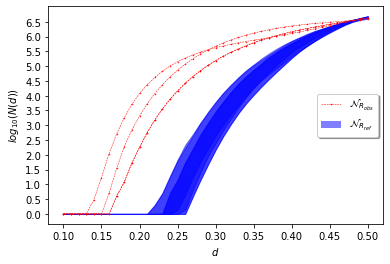

In [7]:
#!/usr/bin/env python
# coding: utf-8

# In[128]:


import re
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import math
import os
from collections import defaultdict
from matplotlib.patches import Rectangle
from matplotlib.patches import Rectangle
import numpy as np
import pylab as P


# In[140]:


def compute_ripley(path):
    regex = re.compile(r"(\d+):\s+(\d+\.\d+):(\d+)")
    collapsed_count_lst_dct = defaultdict(list)
    random_count_lst_dct = defaultdict(list)

    ripleys = [ripley for ripley in os.listdir(path) if 'collapsed' not in ripley and 'DS_Store' not in ripley]
    print(ripleys)
    for ripley in ripleys:
        count = 0
        with open(os.path.join(path, ripley)) as f:
            # print(ripley)
            for line in f:
                line = line.rstrip('\n')
                r = re.search(regex, line)
                if r is not None:
                    random_count_lst_dct[r.group(1)].append(math.log10(max(int(r.group(3)),1)))
                    count += 1
                else:
                    print(line)
        print(count)
    print(len(random_count_lst_dct.keys()))
    with open(os.path.join(path, 'ripley_collapsed.txt')) as f:
        for line in f:
            line = line.rstrip('\n')
            r = re.search(regex, line)
            if r is not None:
                collapsed_count_lst_dct[r.group(1)].append(math.log10(max(int(r.group(3)),1)))
    # print(random_count_lst_dct)
    random_count_arr = []
    for k in random_count_lst_dct.keys():
#         print(type(random_count_lst_dct[k]))
        print(len(random_count_lst_dct[k]))
        if len(random_count_lst_dct[k]) != 40:
            print(random_count_lst_dct[k])
            print(k)
        random_count_arr.append(random_count_lst_dct[k])
    random_count_arr = np.asarray(random_count_arr)
    print(random_count_arr.shape)
    collapsed_count_arr = []
    for k in collapsed_count_lst_dct.keys():
        collapsed_count_arr.append(collapsed_count_lst_dct[k])
    collapsed_count_arr = np.asarray(collapsed_count_arr)
    # print(collapsed_count_arr.shape)
    k = np.mean(collapsed_count_arr, axis=0)
    print(k)
    print(random_count_arr.shape)
    print(random_count_arr)
    low = np.percentile(random_count_arr, 2.5, axis=0)
    high = np.percentile(random_count_arr, 47.5, axis=0)
    return k, low, high


# In[165]:


k_pggan_ffhq, l_pggan_ffhq, h_pggan_ffhq = compute_ripley('../legacy/pggan/monte_carlo_sampling_10m_ffhq/ripley')
k_pggan_celebahq, l_pggan_celebahq, h_pggan_celebahq = compute_ripley('../legacy/pggan/monte_carlo_sampling_10m_celebahq/ripley')
k_sgan_celebahq, l_sgan_celebahq, h_sgan_celebahq = compute_ripley('../legacy/sgan/monte_carlo_sampling_10m_celebahq/ripley')
k_sgan_ffhq, l_sgan_ffhq, h_sgan_ffhq = compute_ripley('../legacy/sgan/monte_carlo_sampling_10m_ffhq/ripley')


# In[211]:


def plot_ripley(k,l,h,fig_name,shaded=True):
    d_lst = list(np.arange(0.1,0.51,0.01))
    k = P.plot(d_lst, k, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}$')[0]
    if shaded:
        P.fill_between(d_lst, l, h, color='b', alpha=0.5, label="filled_region")
        rect = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)
        P.legend([k, rect], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], loc='center right', shadow=True, facecolor='white', framealpha=1)
    else:
        line1 = P.plot(d_lst, l, color='b', marker='^', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$L_{\frac{\alpha}{2}}(\mathcal{N}_{R_{ref}})$')[0]
        line2 = P.plot(d_lst, h, color='b', marker='v', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$H_{1-\frac{\alpha}{2}}(\mathcal{N}_{R_{ref}})$')[0]
        plt.legend(loc='center right', shadow=True, facecolor='white', framealpha=1)
    #P.yticks([])
    P.yticks(np.arange(0, 7, 0.5))
    P.xlabel(r'$d$')
    P.ylabel(r'$log_{10}(N(d))$')
    #P.title("StyleGAN-CelebAHQ-1024")
    P.savefig(fig_name, dpi=800, bbox_inches='tight', pad_inches=0)
    #P.show()


# In[212]:


plot_ripley(k=k_sgan_celebahq, l=l_sgan_celebahq, h=h_sgan_celebahq, fig_name='SGAN_CelebAHQ_1024.pdf', shaded=True)


# In[213]:


plot_ripley(k=k_sgan_ffhq, l=l_sgan_ffhq, h=h_sgan_ffhq, fig_name='SGAN_FFHQ_1024.pdf', shaded=True)


# In[168]:


plot_ripley(k=k_pggan_celebahq, l=l_pggan_celebahq, h=h_pggan_celebahq, fig_name='PGGAN_CelebAHQ_1024.pdf', shaded=True)


# In[214]:


plot_ripley(k=k_pggan_ffhq, l=l_pggan_ffhq, h=h_pggan_ffhq, fig_name='PGGAN_FFHQ_1024.pdf', shaded=True)


# In[215]:

['ripley_0.txt']
4100
100
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.3010299956639812, 0.47712125471966244, 0.8450980400142568, 1.0413926851582251, 1.380211241711606, 1.7708520116421442, 2.0644579892269186, 2.3654879848909, 2.6190933306267428, 2.8674674878590514, 3.093421685162235, 3.303196057420489, 3.5058280338548364, 3.6994040818153375, 3.8794972872494284, 4.064420548433594, 4.240099745587406, 4.410726633014192, 4.5777100411609615, 4.7367469838848155, 4.8855647478717925, 5.021329904995776, 5.143832627969582, 5.253102860402543, 5.351972075584379, 5.440893346472835, 5.520941821978061, 5.593150882904511, 5.659033410064294]
320629
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7781512503836436, 1.146128035678238, 1.591064607026499, 1.9637878273455553, 2.3961993470957363, 2.7371926427047373, 3.0437551269686796, 3.323870606540509, 3.5721743136130595, 3.8063156698081135, 4.009748255948554, 4.198492133677044, 4.3729856059669

907953
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.6020599913279624, 1.146128035678238, 1.505149978319906, 1.8512583487190752, 2.294466226161593, 2.6875289612146345, 3.0409976924234905, 3.3577443251803754, 3.6434526764861874, 3.904985881099363, 4.140288011811867, 4.358011032332095, 4.555529734581364, 4.7324178866240025, 4.892155845029916, 5.0366368786432325, 5.164349881154511, 5.275325178018847, 5.373239440595073, 5.456915386941531, 5.528831888932474, 5.590004303355121, 5.641440396838519, 5.684593146377698, 5.720238709994266, 5.749918650059746]
671488
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.6020599913279624, 1.0413926851582251, 1.5440680443502757, 1.8325089127062364, 2.161368002234975, 2.380211241711606, 2.6570558528571038, 2.8965262174895554, 3.1149444157125847, 3.342620042553348, 3.5519376953648374, 3.744840396785379, 3.929521100631104, 4.1058506743851435, 4.280168465210791, 4.44413

['ripley_0.txt']
4100
100
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6020599913279624, 1.255272505103306, 1.7075701760979363, 2.1789769472931693, 2.617000341120899, 2.962369335670021, 3.277150613963797, 3.5577477416414682, 3.8076026699164944, 4.0308020487722676, 4.227886704613674, 4.40517554621799, 4.563813205514745, 4.706333658648298, 4.8348338181358885, 4.95079795907269, 5.055577082659505, 5.149822393581691, 5.234069091233339, 5.308803369834698, 5.376230112913062, 5.4362835327080905, 5.489730731349511, 5.538283353112332, 5.5811414989920385, 5.619046349115232, 5.652750951341318, 5.682438419500083, 5.708993349464966, 5.732638986533018]
123188
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.6989700043360189, 1.3617278360175928, 1.792391689498254, 2.1931245983544616, 2.545307116465824, 2.8639173769578603, 3.1565491513317814, 3.406028944963615, 3.639386869017684, 3.84210976344061, 4.0322157032979815, 4.197087495449889, 4.349063728125

485994
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47712125471966244, 0.6020599913279624, 1.1760912590556813, 1.4913616938342726, 1.9242792860618816, 2.2695129442179165, 2.6074550232146687, 2.9355072658247128, 3.252610340567373, 3.5199591807520685, 3.7774268223893115, 4.007961033336183, 4.221022805204841, 4.417222504433769, 4.590730405792691, 4.746789832152612, 4.886569680628004, 5.0081528736464085, 5.11656125738153, 5.209592751658808, 5.288727535815681, 5.356698779016796, 5.414732749008823, 5.464385208841898, 5.507700738819774, 5.545791869864442, 5.579751594791746, 5.611013415874143, 5.6407427300874495, 5.669209921217432]
77587
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.7781512503836436, 1.462397997898956, 2.0492180226701815, 2.4955443375464483, 2.8808135922807914, 3.204662511748219, 3.4818724103106633, 3.7477224620355085, 3.9864134054654685, 4.195207549502754, 4.373187949912719, 4.524642736529577, 4.660969772014935, 4.780857

41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47712125471966244, 1.0, 1.4913616938342726, 1.9637878273455553, 2.3404441148401185, 2.7067177823367587, 3.03382569395331, 3.307923703611882, 3.5477747053878224, 3.7571681922142726, 3.947139517642829, 4.119915410257991, 4.277173555485786, 4.413886252329604, 4.542626277818052, 4.657141937944483, 4.763637602376833, 4.8610083989800525, 4.948808932206875, 5.02995164203684, 5.104845461232334, 5.173527157774448, 5.23720431297366, 5.296469933198502, 5.3511157398653895, 5.403153134951823, 5.452689381193854, 5.500449177611905, 5.547070405308744, 5.5925930806249715, 5.63693600143223]
220804
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.47712125471966244, 0.6020599913279624, 1.0791812460476249, 1.414973347970818, 1.806179973983887, 2.184691430817599, 2.4712917110589387, 2.709269960975831, 2.968015713993642, 3.185825359612962, 3.3984608496082234, 3.6047658847038875, 3.800717078282385, 3.9858753573083936, 4.151798722592861, 4.312

['ripley_0.txt']
4100
100
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.3010299956639812, 0.47712125471966244, 0.8450980400142568, 1.0413926851582251, 1.380211241711606, 1.7708520116421442, 2.0644579892269186, 2.3654879848909, 2.6190933306267428, 2.8674674878590514, 3.093421685162235, 3.303196057420489, 3.5058280338548364, 3.6994040818153375, 3.8794972872494284, 4.064420548433594, 4.240099745587406, 4.410726633014192, 4.5777100411609615, 4.7367469838848155, 4.8855647478717925, 5.021329904995776, 5.143832627969582, 5.253102860402543, 5.351972075584379, 5.440893346472835, 5.520941821978061, 5.593150882904511, 5.659033410064294]
320629
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7781512503836436, 1.146128035678238, 1.591064607026499, 1.9637878273455553, 2.3961993470957363, 2.7371926427047373, 3.0437551269686796, 3.323870606540509, 3.5721743136130595, 3.8063156698081135, 4.009748255948554, 4.198492133677044, 4.3729856059669

['ripley_0.txt']
4100
100
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.6989700043360189, 1.1139433523068367, 1.505149978319906, 1.863322860120456, 2.2576785748691846, 2.59659709562646, 2.9273703630390235, 3.2397998184470986, 3.5277587525209717, 3.7826875682349663, 4.02143739646709, 4.234390722392193, 4.429186844904713, 4.605003198204288, 4.764168657377948, 4.907131774350255, 5.034608405632362, 5.149551636414628, 5.251389981240594, 5.341189113495333, 5.420087833187218, 5.489293176271731, 5.5499003674867895, 5.603242917044749, 5.651147124287081, 5.693259875239068]
949868
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.6989700043360189, 1.146128035678238, 1.568201724066995, 1.9777236052888478, 2.359835482339888, 2.7168377232995247, 3.0269416279590295, 3.3453737305590883, 3.621591675859218, 3.873378736409141, 4.104521252618328, 4.318501584158787, 4.511402029689271, 4.6883219167

['ripley_0.txt']
4100
100
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6020599913279624, 1.255272505103306, 1.7075701760979363, 2.1789769472931693, 2.617000341120899, 2.962369335670021, 3.277150613963797, 3.5577477416414682, 3.8076026699164944, 4.0308020487722676, 4.227886704613674, 4.40517554621799, 4.563813205514745, 4.706333658648298, 4.8348338181358885, 4.95079795907269, 5.055577082659505, 5.149822393581691, 5.234069091233339, 5.308803369834698, 5.376230112913062, 5.4362835327080905, 5.489730731349511, 5.538283353112332, 5.5811414989920385, 5.619046349115232, 5.652750951341318, 5.682438419500083, 5.708993349464966, 5.732638986533018]
123188
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.6989700043360189, 1.3617278360175928, 1.792391689498254, 2.1931245983544616, 2.545307116465824, 2.8639173769578603, 3.1565491513317814, 3.406028944963615, 3.639386869017684, 3.84210976344061, 4.0322157032979815, 4.197087495449889, 4.349063728125

41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6020599913279624, 0.9030899869919435, 1.3424226808222062, 1.7853298350107671, 2.2068258760318495, 2.5622928644564746, 2.91539983521227, 3.2062860444124324, 3.4794313371977363, 3.7259932589247224, 3.940317221574218, 4.142232991794714, 4.328420380348951, 4.495558212547868, 4.648974420037966, 4.790320356649597, 4.922907024656001, 5.045753147594141, 5.160375479486067, 5.267225718414968, 5.36586969672454, 5.456872920273341, 5.539824799321106, 5.614413108531906, 5.680926259682992]
542767
41
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3010299956639812, 0.3010299956639812, 0.9542425094393249, 1.0413926851582251, 1.4471580313422192, 1.9344984512435677, 2.3138672203691533, 2.6830470382388496, 2.975431808509263, 3.2631624649622166, 3.522574632691177, 3.7664128471123997, 3.9897167199481047, 4.188731671445743, 4.372138417446431, 4.543012046377036, 4.699699006874801, 4.843120607219163, 

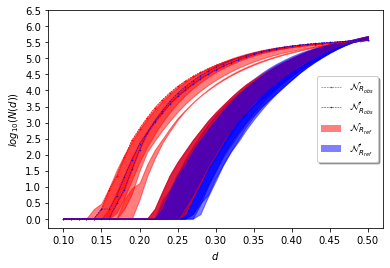

In [10]:
def plot_ripley_combined(k_min,k_max,l,h,fig_name):
    d_lst = list(np.arange(0.1,0.51,0.01))
    P.fill_between(d_lst, k_min, k_max, color='r', alpha=0.5, label="filled_region_obs")
    P.fill_between(d_lst, l, h, color='b', alpha=0.5, label="filled_region_ref")

    rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
    rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

    P.yticks(np.arange(0, 7, 0.5))
    #P.yticks([])
    P.legend([rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{ref}}$'], 
             loc='center right', shadow=True, facecolor='white', framealpha=1)
    P.xlabel(r'$d$')
    P.ylabel(r'$log_{10}(N(d))$')
    #P.title("StyleGAN-Randomness-128")
    P.savefig(fig_name, dpi=800, bbox_inches='tight', pad_inches=0)
    #P.show()


# In[216]:


k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_2/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_3/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_4/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_5/ripley')
k_sgan_max = np.amax(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_1, l_sgan_2, l_sgan_3, l_sgan_4, l_sgan_5], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_1, h_sgan_2, h_sgan_3, h_sgan_4, h_sgan_5], axis=0), axis=0)

plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='SGAN_Randomness_128.pdf')


# In[217]:


k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_7707_finetune/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_8307_finetune/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_9508_finetune/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_10108_finetune/ripley')
k_sgan_6, l_sgan_6, h_sgan_6 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_10708_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')
k_sgan_8, l_sgan_8, h_sgan_8 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_12000_finetune/ripley')

k_sgan_max = np.amax(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5, k_sgan_6, k_sgan_7, k_sgan_8], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_1, k_sgan_2, k_sgan_3, k_sgan_4, k_sgan_5, k_sgan_6, k_sgan_7, k_sgan_8], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_1, l_sgan_2, l_sgan_3, l_sgan_4, l_sgan_5, l_sgan_6, l_sgan_7, l_sgan_8], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_1, h_sgan_2, h_sgan_3, h_sgan_4, h_sgan_5, h_sgan_6, h_sgan_7, h_sgan_8], axis=0), axis=0)
plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='SGAN_Finetune_128.pdf')


# In[218]:


k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1/ripley')
k_sgan_256, l_sgan_256, h_sgan_256 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_256_1/ripley')
k_sgan_512, l_sgan_512, h_sgan_512 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_512_1/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_1024_1/ripley')

#line1 = P.plot(d_lst, l_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
#line2 = P.plot(d_lst, h_pggan_celebahq, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$K_{R_{obs}}(\theta)$')[0]
k_sgan_max = np.amax(np.stack([k_sgan_128, k_sgan_256, k_sgan_512, k_sgan_1024], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_128, k_sgan_256, k_sgan_512, k_sgan_1024], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_128, l_sgan_256, l_sgan_512, l_sgan_1024], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_128, h_sgan_256, h_sgan_512, h_sgan_1024], axis=0), axis=0)
plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='SGAN_Architecture.pdf')


# In[219]:


k_sgan_128, l_sgan_128, h_sgan_128 = compute_ripley('../legacy/pggan/monte_carlo_sampling_1m_128/ripley')
k_sgan_1024, l_sgan_1024, h_sgan_1024 = compute_ripley('../legacy/pggan/monte_carlo_sampling_1m_1024/ripley')

k_sgan_max = np.amax(np.stack([k_sgan_128, k_sgan_1024], axis=0), axis=0)
k_sgan_min = np.amin(np.stack([k_sgan_128, k_sgan_1024], axis=0), axis=0)
l_sgan = np.amin(np.stack([l_sgan_128, l_sgan_1024], axis=0), axis=0)
h_sgan = np.amax(np.stack([h_sgan_128, h_sgan_1024], axis=0), axis=0)

plot_ripley_combined(k_min=k_sgan_min,k_max=k_sgan_max,l=l_sgan,h=h_sgan,fig_name='PGGAN_Architecture.pdf')


# In[187]:


def plot_ripley_calibration(k1,k2,l1,h1,l2,h2,fig_name):
    d_lst = list(np.arange(0.1,0.51,0.01))
    
    k1 = P.plot(d_lst, k1, color='r', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}$')[0]
    k2 = P.plot(d_lst, k2, color='b', marker='o', linestyle='dashed', linewidth=0.5, markersize=0.5, label=r'$\mathcal{N}_{R_{obs}}^\prime$')[0]
    P.fill_between(d_lst, l1, h1, color='r', alpha=0.5, label="filled_region_ref_1")
    P.fill_between(d_lst, l2, h2, color='b', alpha=0.5, label="filled_region_ref_2")

    rect_r = Rectangle((0, 0), 1, 1, fc="r", alpha=0.5)
    rect_b = Rectangle((0, 0), 1, 1, fc="b", alpha=0.5)

    P.yticks(np.arange(0, 7, 0.5))
    P.legend([k1, k2, rect_r, rect_b], [r'$\mathcal{N}_{R_{obs}}$', r'$\mathcal{N}_{R_{obs}}^\prime$',
                                        r'$\mathcal{N}_{R_{ref}}$', r'$\mathcal{N}_{R_{ref}}^\prime$'], 
             loc='center right', shadow=True, facecolor='white', framealpha=1)
    P.xlabel(r'$d$')
    P.ylabel(r'$log_{10}(N(d))$')
    #P.title("StyleGAN-Randomness-128")
    P.savefig(fig_name, dpi=800, bbox_inches='tight', pad_inches=0)


# In[188]:


k_sgan_1, l_sgan_1, h_sgan_1 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_7707_finetune/ripley')
k_sgan_2, l_sgan_2, h_sgan_2 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_8307_finetune/ripley')
k_sgan_3, l_sgan_3, h_sgan_3 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_8908_finetune/ripley')
k_sgan_4, l_sgan_4, h_sgan_4 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_9508_finetune/ripley')
k_sgan_5, l_sgan_5, h_sgan_5 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_10108_finetune/ripley')
k_sgan_6, l_sgan_6, h_sgan_6 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_10708_finetune/ripley')
k_sgan_7, l_sgan_7, h_sgan_7 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_11309_finetune/ripley')
k_sgan_8, l_sgan_8, h_sgan_8 = compute_ripley('../legacy/sgan/monte_carlo_sampling_1m_128_1_12000_finetune/ripley')


# In[189]:


plot_ripley_calibration(k1=k_sgan_1, k2=k_sgan_4, l1=l_sgan_1, h1=h_sgan_1, l2=l_sgan_4, h2=h_sgan_4 , fig_name='CelebAHQ_GMM_128.pdf')


# In[190]:


plot_ripley_calibration(k1=k_sgan_1, k2=k_sgan_5, l1=l_sgan_1, h1=h_sgan_1, l2=l_sgan_5, h2=h_sgan_5 , fig_name='CelebAHQ_IS_128.pdf')